In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cpyment import CModel

Let's now try fitting the parameters of a SIR model. We'll create two models: one to perform the fit with, and a target model to generate the data we will fit on. The data will be generated by extracting random points from a trajectory for the target model and adding some noise. It will then be used to fit the original model on.

Note that in this case we're passing data for all three states (S, I, and R) to the fit. This is not always necessarily the case. In general, for a model with N states, data can be passed to `.fit` in two ways:

* as a $(:, N+1)$ Numpy array. In that case the first column is time, and the following N are the states. Wherever data is not available, put np.nan, or None.
* as a list of dictionaries. In this case each dictionary should contain a member `t` and then can have other members with the labels of the various states (e.g. `{'t': 0.54, 'S': 0.3}` would be valid for a SIR model).

In [3]:
fmodel = CModel.make_SIR()

btarg = 4.5
gtarg = 2.1
tmodel = CModel.make_SIR(btarg, gtarg)

In [4]:
# Generate some random data
N = 1000
t = np.linspace(0, 3, N)
y0targ = [0.9, 0.1, 0]

traj = tmodel.integrate(t, y0targ)['y']

# Extract some data from the early part of the curves
data_i = np.random.choice(range(int(N/2)), size=30, replace=False)
data_x = t[data_i]
data_y = traj[data_i] + (np.random.random((len(data_x), 3))-0.5)*0.1 # Data made artificially noisy

data = np.concatenate([data_x[:,None], data_y], axis=1)

In [5]:
# Now fit

sol = fmodel.fit(data)

fittraj = fmodel.integrate(t, sol.y0)['y']

In [6]:
# Fit results?

print('Target parameters:')
print('  beta = {0}'.format(btarg))
print('  gamma = {0}'.format(gtarg))
print('  y0 = {0}'.format(y0targ))

print('Fitted parameters:')
print('  beta = {0}'.format(sol.C['beta']))
print('  gamma = {0}'.format(sol.C['gamma']))
print('  y0 = {0}'.format(sol.y0))

print('Fitting quality:')
print('  R2 = {0}'.format(sol.R2))
print('  MRPD = {0}'.format(sol.MRPD))

Target parameters:
  beta = 4.5
  gamma = 2.1
  y0 = [0.9, 0.1, 0]
Fitted parameters:
  beta = 4.295777537404503
  gamma = 1.886508545886076
  y0 = [0.89721105 0.09473709 0.02272892]
Fitting quality:
  R2 = [1.04088253 0.68137292 0.93272533]
  MRPD = 0.16863007152887752


<IPython.core.display.Javascript object>


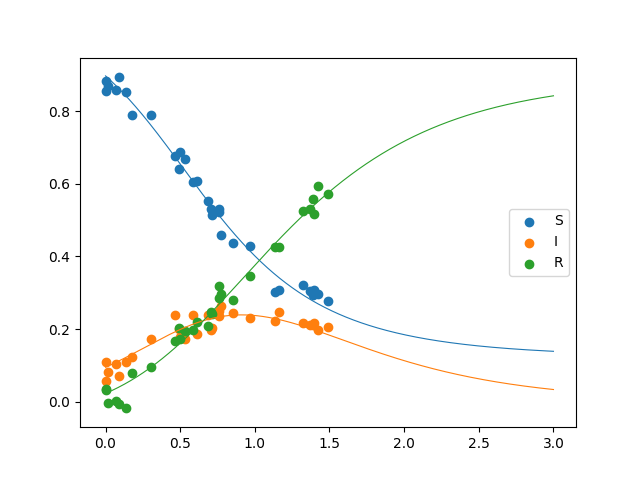

In [7]:
fig, ax = plt.subplots()

for i in range(3):
    ax.scatter(data[:,0], data[:,i+1], label='SIR'[i])
    ax.plot(t, fittraj[:,i], lw=0.8)
    
ax.legend()

Fitting can also be partial, where some values are constrained to take fixed amounts.

In [13]:
constr = {
    'S0': y0targ[0],
    'I0': y0targ[1],
    'R0': y0targ[2]
}
sol = fmodel.fit(data, constraints=constr)

fittraj = fmodel.integrate(t, sol.y0)['y']

In [14]:
print('Fitted parameters (with constrained y0):')
print('  beta = {0}'.format(sol.C['beta']))
print('  gamma = {0}'.format(sol.C['gamma']))

Fitted parameters (with constrained y0):
  beta = 4.322251856176114
  gamma = 1.966654467152744


<IPython.core.display.Javascript object>


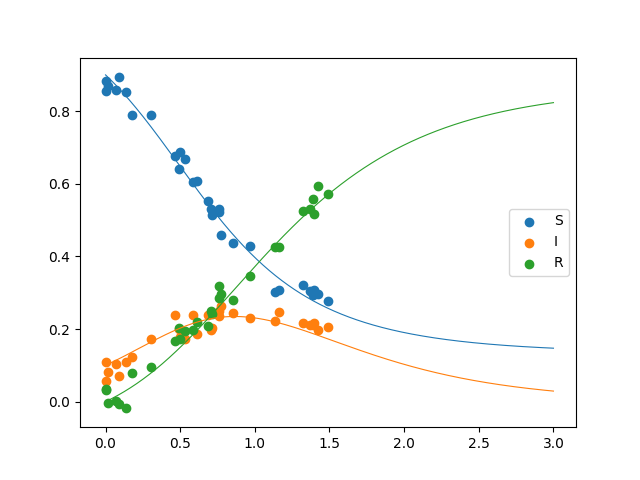

In [15]:
fig, ax = plt.subplots()

for i in range(3):
    ax.scatter(data[:,0], data[:,i+1], label='SIR'[i])
    ax.plot(t, fittraj[:,i], lw=0.8)
    
ax.legend()